In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import re

In [2]:
df = pd.concat([
    pd.read_csv(file)
    for file in Path('data').glob('*.csv')
])
df['sqm_price'] = df['sqm_price'].apply(lambda x: int(re.sub(r'\D', '', x)))
df['sales_date'] = pd.to_datetime(df['sales_date'], format='%d-%m-%Y')
# sort by sales date
df = df.sort_values(by=['sales_date'], ascending=False)

# find all rows where address contains "2A", "2B", "4A", "4B", "22", "24"
# and not contains 'st'
# and where sales_date is after 2019-01-01
df = df[
    df['address'].str.contains(r'2A|2B|4A|4B|22|24') &
    ~df['address'].str.contains(r'st') &
    (df['sales_date'] > '2020-03-01') &
    (df['price'] > 1.75e6)
]

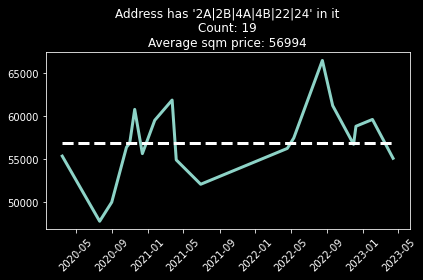

In [3]:
plt.plot(
    df['sales_date'],
    df['price'] / df['sqm'],
    lw=3,
)

# compute the global avg and plot it as a dotted line
plt.hlines(
    df['price'].sum() / df['sqm'].sum(),
    df['sales_date'].min(),
    df['sales_date'].max(),
    linestyles='dashed',
    lw=3
)

# rotate x labels
plt.xticks(rotation=45)

plt.title(f"Address has '2A|2B|4A|4B|22|24' in it\nCount: {len(df)}\nAverage sqm price: {df['sqm_price'].mean():.0f}")
plt.tight_layout()
plt.savefig('plot.png', bbox_inches='tight', transparent=False)
plt.show()

In [4]:
# markdown report
report = """
# Apartments analysis

Welcome to my automated analysis of apartments in Copenhagen.
This is a toy project to try out [git scraping](https://simonwillison.net/2020/Oct/9/git-scraping).

# Analysis
"""

report += "![](plot.png)\n"

df_report = df[['address', 'sales_date', 'sqm', 'price', 'sqm_price']].copy()
df_report['sales_date'] = df_report['sales_date'].dt.strftime('%d-%m-%Y')
df_report = df_report.set_index('address', drop=True)
table_md = df_report.to_markdown()
report += table_md + '\n'

Path('README.md').write_text(report)

1766